In [ ]:
## Importing the modules...
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

In [ ]:
data = pd.read_csv('/content/ecommerce_purchase_data.csv')

In [ ]:
## displaying the Fist values
data.head()

,CustomerID,Age,Gender,AnnualIncome,PurchaseAmount,PurchaseFrequency,LastPurchaseDate,ProductCategory,LoyaltyProgramMember,CustomerRating
0,1.0,56.0,Male,70225.0,125.635565,48.0,01-01-2023,Toys,0.0,1.210366
1,2.0,69.0,Male,57952.0,156.417933,NaN,02-01-2023,Books,0.0,3.201970
2,3.0,46.0,Other,57663.0,244.151650,39.0,03-01-2023,Toys,0.0,2.229175
3,4.0,32.0,Female,81381.0,36.275633,29.0,04-01-2023,Books,1.0,3.134410
4,5.0,60.0,Male,67929.0,307.515054,24.0,NaN,Clothing,1.0,1.537188


In [ ]:
## displaying the last values
data.tail()

,CustomerID,Age,Gender,AnnualIncome,PurchaseAmount,PurchaseFrequency,LastPurchaseDate,ProductCategory,LoyaltyProgramMember,CustomerRating
2995,2996.0,38.0,Other,110283.0,312.042883,5.0,15-03-2031,Home,1.0,3.942962
2996,2997.0,52.0,Female,92255.0,150.675418,37.0,16-03-2031,Toys,0.0,1.062000
2997,2998.0,49.0,Male,101899.0,47.790648,31.0,17-03-2031,Books,1.0,4.519943
2998,2999.0,47.0,Male,48718.0,380.917209,12.0,18-03-2031,Clothing,1.0,1.403219
2999,3000.0,56.0,Male,114337.0,160.451782,35.0,19-03-2031,Home,0.0,1.562095


In [ ]:
## showing the shape of the data means(no.of row and columns)
data.shape

(3000, 10)

In [ ]:
## counting the Null values in the data set
data.isnull().sum()

,0
CustomerID,53
Age,38
Gender,36
AnnualIncome,45
PurchaseAmount,44
PurchaseFrequency,55
LastPurchaseDate,35
ProductCategory,51
LoyaltyProgramMember,46
CustomerRating,43


In [ ]:
## Removing the Null values in the data set...
data.dropna(subset=('LoyaltyProgramMember', 'CustomerRating', 'PurchaseFrequency', 'PurchaseAmount', 'AnnualIncome', 'Age'), inplace=True )

In [ ]:
## We have droped the unwanted data features in the data set ..
data.drop(['CustomerID', 'Gender', 'LastPurchaseDate'], axis=1, inplace=True)

In [ ]:
##droping null values
data.dropna(subset=['ProductCategory'], inplace=True)

In [ ]:
## displaying unique values
data.ProductCategory.unique()

array(['Toys', 'Books', 'Clothing', 'Home', 'Electronics'], dtype=object)

In [ ]:
## doing feature engineering (label encoding)
data['ProductCategory'] = data['ProductCategory'].replace('Toys', 0)
data['ProductCategory'] = data['ProductCategory'].replace('Books', 1)
data['ProductCategory'] = data['ProductCategory'].replace('Clothing', 2)
data['ProductCategory'] = data['ProductCategory'].replace('Home', 3)
data['ProductCategory'] = data['ProductCategory'].replace('Electronics', 4)

In [ ]:
data.head()


,Age,AnnualIncome,PurchaseAmount,PurchaseFrequency,ProductCategory,LoyaltyProgramMember,CustomerRating
0,56.0,70225.0,125.635565,48.0,0,0.0,1.210366
2,46.0,57663.0,244.151650,39.0,0,0.0,2.229175
3,32.0,81381.0,36.275633,29.0,1,1.0,3.134410
4,60.0,67929.0,307.515054,24.0,2,1.0,1.537188
5,25.0,29343.0,491.948842,22.0,2,1.0,4.730520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2694 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2694 non-null   float64
 1   AnnualIncome          2694 non-null   float64
 2   PurchaseAmount        2694 non-null   float64
 3   PurchaseFrequency     2694 non-null   float64
 4   ProductCategory       2694 non-null   int64  
 5   LoyaltyProgramMember  2694 non-null   float64
 6   CustomerRating        2694 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 168.4 KB


In [ ]:
data.shape

(2694, 7)

In [ ]:
## Training the model using IsolationForest function
isolation_forest = IsolationForest(contamination='auto', random_state=42)
isolation_forest.fit(data)
data['Anomaly'] = isolation_forest.predict(data)

In [ ]:
data.head()

,Age,AnnualIncome,PurchaseAmount,PurchaseFrequency,ProductCategory,LoyaltyProgramMember,CustomerRating,Anomaly
0,56.0,70225.0,125.635565,48.0,0,0.0,1.210366,-1
2,46.0,57663.0,244.151650,39.0,0,0.0,2.229175,1
3,32.0,81381.0,36.275633,29.0,1,1.0,3.134410,1
4,60.0,67929.0,307.515054,24.0,2,1.0,1.537188,1
5,25.0,29343.0,491.948842,22.0,2,1.0,4.730520,-1


In [ ]:
data.isnull().sum()

,0
Age,0
AnnualIncome,0
PurchaseAmount,0
PurchaseFrequency,0
ProductCategory,0
LoyaltyProgramMember,0
CustomerRating,0
Anomaly,0


In [ ]:
## Counting anomalies in the data set..
pd.value_counts(data['Anomaly'])

<ipython-input-77-d8bec1e72c79>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['Anomaly'])


,count
Anomaly,
-1,2306
1,388


In [ ]:
data.describe()

,Age,AnnualIncome,PurchaseAmount,PurchaseFrequency,ProductCategory,LoyaltyProgramMember,CustomerRating,Anomaly
count,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000
mean,43.510393,69879.481440,253.701270,25.217520,1.963994,0.503341,3.013653,-0.711952
std,14.879254,29233.301992,143.728618,14.196888,1.411258,0.500082,1.149650,0.702358
min,18.000000,20060.000000,5.370116,1.000000,0.000000,0.000000,1.001010,-1.000000
25%,31.000000,44365.000000,133.421519,13.000000,1.000000,0.000000,2.022422,-1.000000
50%,44.000000,69591.000000,255.669715,25.000000,2.000000,1.000000,3.044879,-1.000000
75%,56.000000,96077.000000,376.057234,38.000000,3.000000,1.000000,3.994410,-1.000000
max,69.000000,119993.000000,499.925376,49.000000,4.000000,1.000000,4.999221,1.000000


In [ ]:
import matplotlib.pyplot as plt



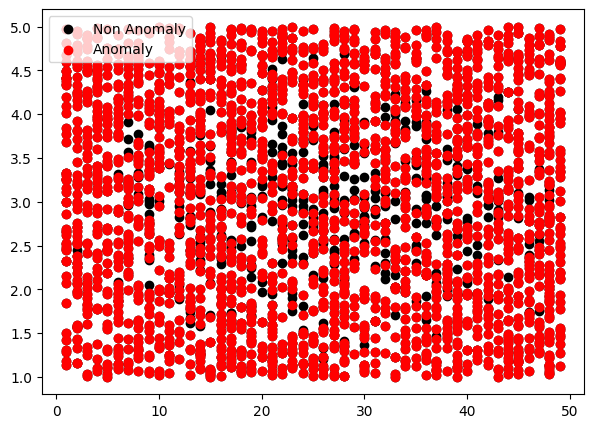

In [ ]:
## Displaying oulieries using scatter plot...
plt.figure(figsize=(7,5))
plt.scatter(data['PurchaseFrequency'], data['CustomerRating'], color='black', label='Non Anomaly')
plt.scatter(data[data['Anomaly'] == -1]['PurchaseFrequency'], data[data['Anomaly'] == -1]['CustomerRating'], color='red', label='Anomaly')
plt.legend()

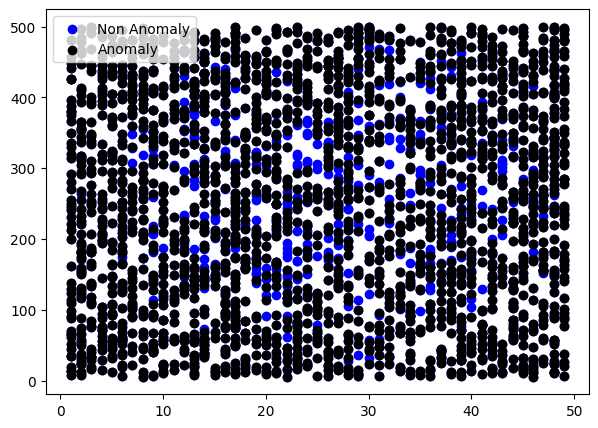

In [ ]:
## Displaying oulieries using scatter plot...
plt.figure(figsize=(7,5))
plt.scatter(data['PurchaseFrequency'], data['PurchaseAmount'], color='blue', label='Non Anomaly')
plt.scatter(data[data['Anomaly'] == -1]['PurchaseFrequency'], data[data['Anomaly'] == -1]['PurchaseAmount'], color='black', label='Anomaly')
plt.legend()